In [3]:

#Normalise time series data
from sklearn.preprocessing import MinMaxScaler

#Get Data
from pandas_datareader import DataReader # pip install pandas-datareader
from pandas_datareader import data
from datetime import datetime

import pandas as pd
import plotly as ply
 
start = pd.to_datetime('2010-01-01') # in YYYY-MM-DD format
end = pd.to_datetime('today')
ts = data.DataReader('NDAQ', 'yahoo', start , end) # here 'yahoo' is the API to yahoo

<AxesSubplot:title={'center':'NDAQ 2010-2021'}, xlabel='Date'>

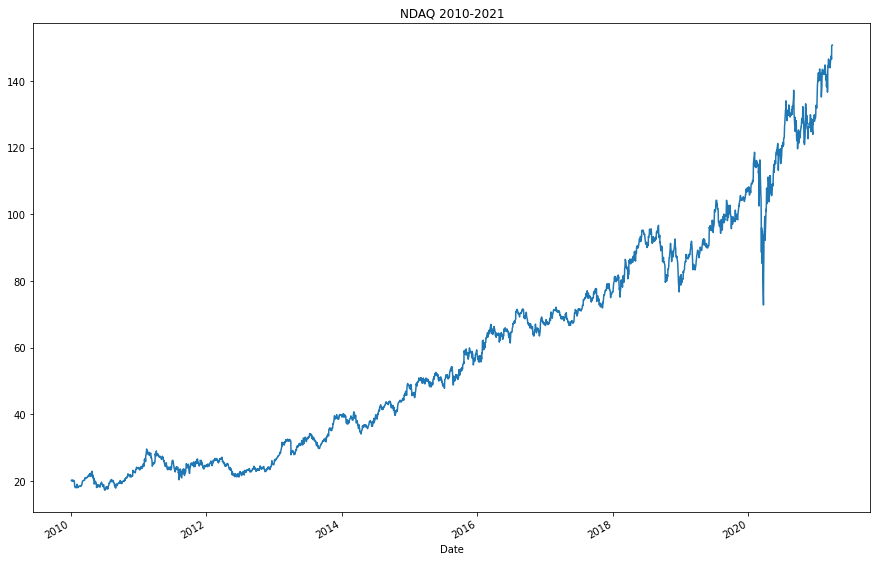

In [4]:
ts.Close.plot(figsize=(15,10), title = "NDAQ 2010-2021")
#PLAIN DATA

In [5]:
print(ts.head)

<bound method NDFrame.head of                   High         Low        Open       Close     Volume  \
Date                                                                    
2010-01-04   20.430000   19.900000   19.920000   20.240000  2171500.0   
2010-01-05   20.320000   19.930000   19.930000   20.299999  1481700.0   
2010-01-06   20.360001   20.160000   20.200001   20.290001  2446700.0   
2010-01-07   20.299999   19.889999   20.250000   20.020000  2832800.0   
2010-01-08   20.299999   19.879999   20.030001   20.230000  1449200.0   
...                ...         ...         ...         ...        ...   
2021-03-23  148.949997  145.850006  145.850006  147.570007  1298300.0   
2021-03-24  148.610001  146.779999  147.720001  147.330002   643400.0   
2021-03-25  147.520004  145.520004  147.520004  146.570007   678700.0   
2021-03-26  150.800003  146.330002  146.669998  150.720001   620400.0   
2021-03-29  151.460007  149.149994  149.830002  150.839996   518700.0   

             Adj Clo

In [6]:
#Change table to only have closing values

ts = data.DataReader('NDAQ', 'yahoo', start , end) # here 'yahoo' is the API to yahoo
ts = ts['Adj Close']
print(ts)

Date
2010-01-04     17.347511
2010-01-05     17.398933
2010-01-06     17.390356
2010-01-07     17.158953
2010-01-08     17.338934
                 ...    
2021-03-23    147.570007
2021-03-24    147.330002
2021-03-25    146.570007
2021-03-26    150.720001
2021-03-29    150.839996
Name: Adj Close, Length: 2828, dtype: float64


In [7]:
#Prepare data for normalization
values = ts.values
values = values.reshape((len(values), 1))

In [8]:
#Train the normalization
scaler = MinMaxScaler(feature_range=(0,1))
scaler = scaler.fit(values)
print('Min: %f, Max: %f' % (scaler.data_min_, scaler.data_max_))

Min: 14.827660, Max: 150.839996


In [9]:
# normalize the dataset and print the first 5 rows
normalized = scaler.transform(values)
for i in range(5):
    print(normalized[i])

[0.01852664]
[0.01890471]
[0.01884165]
[0.01714031]
[0.01846358]


In [10]:
#inverse transform and print the first 5 rows
inversed = scaler.inverse_transform(normalized)
for i in range(5):
      print(inversed[i])  

[17.34751129]
[17.39893341]
[17.39035606]
[17.15895271]
[17.33893394]


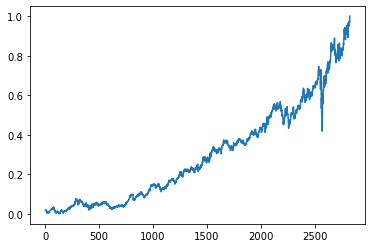

In [11]:
#Plotting the normalized dataset
from bqplot import pyplot as plt
import ipywidgets as widgets
import numpy as np

import matplotlib.pyplot as plt
plt.plot(normalized)

<AxesSubplot:>

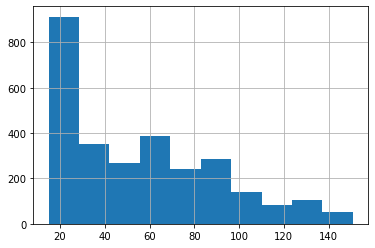

In [12]:
ts.hist()

<AxesSubplot:ylabel='Frequency'>

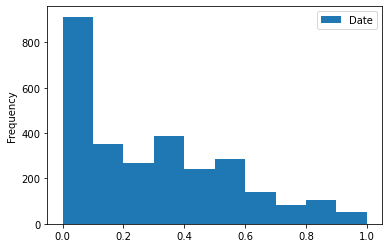

In [13]:
df = pd.DataFrame(normalized, columns=['Date'])

df.plot.hist(by=None, bins=10)

In [ ]:
# STANDARDIZING THE DATA

In [ ]:
from sklearn.preprocessing import StandardScaler
from math import sqrt

# prepare data for standardization
values = ts.values
values = values.reshape((len(values), 1))

In [ ]:
# train the standardization
scaler = StandardScaler()
scaler = scaler.fit(values)
print('Mean: %f, StandardDeviation: %f' % (scaler.mean_, sqrt(scaler.var_)))

In [ ]:
# standardization the dataset and print the first 5 rows
normalized = scaler.transform(values)
for i in range(5):
    print(normalized[i])

In [ ]:
# inverse transform and print the first 5 rows
inversed = scaler.inverse_transform(normalized)
for i in range(5):
    print(inversed[i])

In [36]:
ts = data.DataReader('NDAQ', 'yahoo', start , end) # here 'yahoo' is the API to yahoo
ts = ts['Adj Close']
print(ts)

Date
2010-01-04     17.347511
2010-01-05     17.398933
2010-01-06     17.390356
2010-01-07     17.158953
2010-01-08     17.338934
                 ...    
2021-03-23    147.570007
2021-03-24    147.330002
2021-03-25    146.570007
2021-03-26    150.720001
2021-03-29    150.839996
Name: Adj Close, Length: 2828, dtype: float64


In [32]:
ts = data.DataReader('NDAQ', 'yahoo', start , end) # here 'yahoo' is the API to yahoo
ts = ts['Adj Close']

In [35]:
df = pd.DataFrame(normalized, columns=['Date'])
values = ts.values
values = values.reshape((len(values), 1))

In [34]:
import plotly.express as px
from jupyter_dash import JupyterDash
import dash_core_components as dcc
import dash_html_components as html
from dash.dependencies import Input, Output
# Load Data
df = pd.DataFrame(normalized, columns=['Date'])
# Build App
app = JupyterDash(__name__)
app.layout = html.Div([
    html.H1("JupyterDash Demo"),
    dcc.Graph(id='graph'),
    html.Label([
        "colorscale",
        dcc.Dropdown(
            id='colorscale-dropdown', clearable=False,
            value='plasma', options=[
                {values: c, 'Date': c}
                for c in px.colors.named_colorscales()
            ])
    ]),
])
# Define callback to update graph
@app.callback(
    Output('graph', 'figure'),
    [Input("colorscale-dropdown", "value")]
)
def update_figure(colorscale):
    return px.scatter(
        df, x="Date", y="Date", color="Date",
        color_continuous_scale=colorscale,
        render_mode="webgl", title="Tips"
    )
# Run app and display result inline in the notebook
app.run_server(mode='inline')

TypeError: unhashable type: 'numpy.ndarray'